In [15]:
import pandas as pd

In [16]:
prices = pd.read_csv("sample_stock_prices.csv")
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.001953,0.008608
2,0.004111,0.001795
3,-0.003054,0.005836
4,-0.002497,0.015671
5,0.018547,-0.004662
6,0.011669,0.001156
7,0.002722,0.017024
8,-0.017159,-0.016515
9,-0.019191,0.013305


In [17]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.001953,0.008608
2,0.004111,0.001795
3,-0.003054,0.005836
4,-0.002497,0.015671
5,0.018547,-0.004662
6,0.011669,0.001156
7,0.002722,0.017024
8,-0.017159,-0.016515
9,-0.019191,0.013305
10,0.011126,0.014800


In [18]:
returns.std()

BLUE      0.012149
ORANGE    0.009870
dtype: float64

In [19]:
deviations = returns - returns.mean()
squared_dev = deviations**2
variance = squared_dev.mean()
import numpy as np
volatility = np.sqrt(variance)
volatility

BLUE      0.011632
ORANGE    0.009450
dtype: float64

The above results differ from the std() method because of sample std dev versus population std dev

In [20]:
# we will calculate the volatility using the sample size minus 1
number_of_obs = returns.shape[0] # number of rows
variance = squared_dev.sum()/(number_of_obs - 1)
volatility = variance**0.5

In [21]:
volatility

BLUE      0.012149
ORANGE    0.009870
dtype: float64

In [22]:
# annualise the standard deviation, assuming the returns dataframe has monthly returns
returns.std()*np.sqrt(12)

BLUE      0.042086
ORANGE    0.034192
dtype: float64

In [50]:
returns = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                      skiprows=1,
                      header=0, index_col=0, parse_dates=True, na_values=-99.99
                      )

C:\Users\shantala.mukherjee\AppData\Local\Temp\ipykernel_12436\3407395820.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  returns = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",


In [51]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec-02,Dec-03,Dec-04,Dec-05,Dec-06,Dec-07,Dec-08,Dec-09,Hi 10
192607,NaN,-0.43,1.45,2.68,-0.57,0.37,1.65,1.50,3.33,-1.42,0.29,-0.15,0.88,1.45,1.85,1.63,1.38,3.38,3.29
192608,NaN,3.74,3.03,2.09,3.60,3.64,3.66,1.58,2.33,4.61,2.59,4.03,3.24,2.66,4.67,1.54,1.63,0.98,3.70
192609,NaN,-1.07,-0.59,0.16,-0.48,-1.55,0.03,-0.47,-0.09,0.91,-1.87,-2.27,-0.84,0.12,-0.07,-1.58,0.64,-0.86,0.67
192610,NaN,-3.29,-3.56,-3.06,-3.25,-4.18,-2.90,-3.36,-2.95,-4.72,-1.77,-3.36,-5.01,-3.09,-2.71,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.83,3.09,-0.54,2.25,3.37,3.37,3.16,-0.77,-0.32,-0.29,4.79,3.17,3.58,3.80,2.95,3.61,2.70


In [52]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.42,3.29
192608,4.61,3.70
192609,0.91,0.67
192610,-4.72,-2.43
192611,-0.77,2.70


In [53]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, 192607 to 202403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lo 10   1173 non-null   float64
 1   Hi 10   1173 non-null   float64
dtypes: float64(2)
memory usage: 27.5 KB


In [54]:
# The returns are in percentage form, and we want to convert them to decimals, so we will divide each value by 100
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0142,0.0329
192608,0.0461,0.0370
192609,0.0091,0.0067
192610,-0.0472,-0.0243
192611,-0.0077,0.0270


In [55]:
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0142,0.0329
192608,0.0461,0.0370
192609,0.0091,0.0067
192610,-0.0472,-0.0243
192611,-0.0077,0.0270


<Axes: >

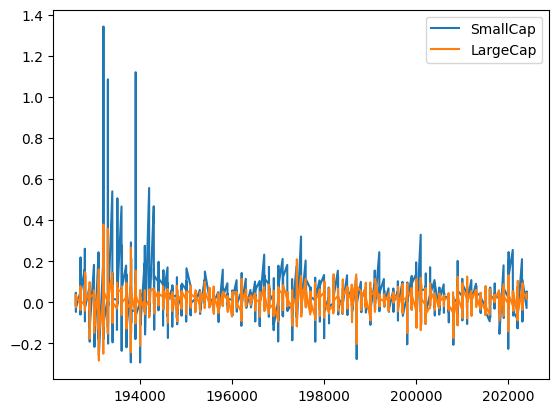

In [56]:
returns.plot.line()

In [57]:
returns.std()

SmallCap    0.105108
LargeCap    0.053827
dtype: float64

In [58]:
import numpy as np
ann_vol = returns.std()*np.sqrt(12)
ann_vol

SmallCap    0.364104
LargeCap    0.186462
dtype: float64

In [60]:
n_months = returns.shape[0] #number of months
ret_per_month = ((returns+1).prod())**(1/n_months) - 1 #geometric mean of monthly returns over the entire period
ret_per_month

SmallCap    0.012647
LargeCap    0.007650
dtype: float64

In [61]:
ann_ret = (ret_per_month + 1)**(12) - 1
ann_ret

SmallCap    0.162776
LargeCap    0.095765
dtype: float64

In [62]:
# alternative way of calculating the annualised return in one step:
ann_ret = ((returns+1).prod())**(12/n_months) - 1
ann_ret

SmallCap    0.162776
LargeCap    0.095765
dtype: float64

In [63]:
ann_ret/ann_vol

SmallCap    0.447059
LargeCap    0.513589
dtype: float64

In [64]:
risk_free_rate = 0.03 # arbitrary value for RFR
excess_ret = ann_ret - risk_free_rate
sharpe_ratio = excess_ret/ann_vol
sharpe_ratio

SmallCap    0.364665
LargeCap    0.352698
dtype: float64